# Exemplo de um workflow de aprendizagem máquina

### *Conjunto de dados Human Activity Recognition using Smartphones*

Descrição do dataset: 
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

*The experiments have been carried out with a group of 30 volunteers (…). Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (…). Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity (…). The experiments have been video-recorded to label the data manually. The dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data*

Descarregar os dados do link seguinte e descompactar o ZIP: https://archive.ics.uci.edu/ml/machine-learning-databases/00240/

**Estrutura dos dados** (ficheiros principais):
* Códigos das atividades: “activity_labels.txt” (2 colunas)
* Atributos: “features.txt” (561 linhas, 2 colunas)
* Indivíduos (treino ; teste): “train/subject_train.txt” (7352 linhas), “test/subject_test.txt” (2947 linhas), ambos com 1 coluna 
* Atributos de entrada – X (treino; teste): “train/X_train.txt” (7352 linhas), “test/X_test.txt” (2947 linhas), ambos com 561 colunas
* Atributo de saída (atividade) – y (treino; teste): “train/y_train.txt” (7352 linhas), “test/y_test.txt” (2947 linhas), ambos com 1 coluna


**Variáveis:**
For each record in the dataset it is provided: 
* A 561-feature vector with time and frequency domain variables. 
* Its activity label. 
* An identifier of the subject who carried out the experiment.


### Carregar os dados

Ao descompactar o ficheiro a pasta base será UCI HAR Dataset. Definir a variável folder abaixo com path absoluto dessa pasta. Se estiver na pasta onde está o notebook bastará: `folder = "./UCI HAR Dataset/"`

In [1]:
folder = "/Users/miguelrocha/Dropbox/Programming/Python3/scipy-examples/UCI HAR Dataset"

In [2]:
import pandas as pd

In [3]:
activities = pd.read_csv(folder+'/activity_labels.txt', sep=' ', header=None, names=('ID','Activity'))
print(activities)

   ID            Activity
0   1             WALKING
1   2    WALKING_UPSTAIRS
2   3  WALKING_DOWNSTAIRS
3   4             SITTING
4   5            STANDING
5   6              LAYING


In [4]:
features = pd.read_csv(folder+"/features.txt", sep = " ", header = None, names=('ID','Sensor'))
print(features.shape)
features.head()

(561, 2)


,ID,Sensor
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [5]:
subjects_tr = pd.read_csv(folder+"/train/subject_train.txt", header = None, names=['SubjectID'])
subjects_tr.head()

,SubjectID
0,1
1,1
2,1
3,1
4,1


In [6]:
subjects_tst = pd.read_csv(folder+"/test/subject_test.txt", header = None, names=['SubjectID'])
print(subjects_tr.shape, subjects_tst.shape)

(7352, 1) (2947, 1)


In [7]:
x_train = pd.read_csv(folder+"/train/X_train.txt", sep = "\s+", header = None)
x_test = pd.read_csv(folder+"/test/X_test.txt", sep = "\s+", header = None)
print(x_train.shape, x_test.shape)

(7352, 561) (2947, 561)


In [8]:
y_train = pd.read_csv(folder+"/train/y_train.txt", header=None, names=['ActivityID'])
y_test = pd.read_csv(folder+"/test/y_test.txt", header=None, names=['ActivityID'])
print(y_train.shape, y_test.shape)

(7352, 1) (2947, 1)


### Preparação dos dados

Juntar os conjuntos de dados de treino e teste

In [9]:
subjects_all = pd.concat([subjects_tr, subjects_tst], ignore_index=True)
print(subjects_all.shape)

(10299, 1)


In [10]:
x_all = pd.concat([x_train, x_test], ignore_index = True)
print(x_all.shape)

(10299, 561)


In [11]:
y_all = y_train.append(y_test, ignore_index=True)
print(y_all.shape)

(10299, 1)


Colocar nomes das colunas de X como nomes das features

In [12]:
sensorNames = features['Sensor']
x_all.columns = sensorNames
x_all.head()

Sensor,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


Substituir códigos de atividade pela designação (string)

In [13]:
for i in activities['ID']:
    activity = activities[activities['ID'] == i]['Activity'] 
    y_all = y_all.replace({i: activity.iloc[0]})
    
y_all.columns = ['Activity']
y_all.head()

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [14]:
y_all.tail()

,Activity
10294,WALKING_UPSTAIRS
10295,WALKING_UPSTAIRS
10296,WALKING_UPSTAIRS
10297,WALKING_UPSTAIRS
10298,WALKING_UPSTAIRS


Juntar tudo num único DataFrame e guardar num CSV

In [15]:
x_all = pd.concat([x_all, subjects_all], axis=1)
allXy = pd.concat([x_all, y_all], axis=1)
print(allXy.shape)

allXy.to_csv("HAR_clean.csv")

(10299, 563)


Agregação dos dados para um dataset mais pequeno (por indivíduo e por atividade)

In [16]:
import numpy as np
grouped = allXy.groupby (['SubjectID', 'Activity']).aggregate(np.mean)

print(grouped.shape)
grouped.head()

grouped.to_csv("HAR_grouped.csv")

(180, 561)


### Exploração do conjunto de dados

Caraterizar as distribuições de valores das variáveis de entrada

In [17]:
input_data = allXy.iloc[:,:-2]

input_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Caraterizar a distribuição de valores da variável de saída

In [18]:
output_data = allXy.iloc[:,-1]
output_data.describe()

count      10299
unique         6
top       LAYING
freq        1944
Name: Activity, dtype: object

In [19]:
allXy.groupby("Activity").size()

Activity
LAYING                1944
SITTING               1777
STANDING              1906
WALKING               1722
WALKING_DOWNSTAIRS    1406
WALKING_UPSTAIRS      1544
dtype: int64

<AxesSubplot:ylabel='None'>

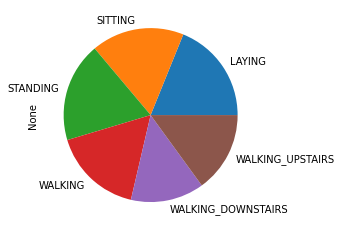

In [20]:
freqs_activities = allXy.groupby("Activity").size()
freqs_activities.plot.pie()

Verificar se existem valores nulos

In [21]:
allXy.isnull().sum().sum()

0

Standardizar os dados

In [22]:
from sklearn import preprocessing
sc_input = preprocessing.scale(input_data)

### Análise não supervisionada

Realizar um processo de PCA que explique pelo menos 80% da variabilidade

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
pca.fit(sc_input)
X_reduced = pca.transform(sc_input)
X_reduced.shape[1]

27

Represente a variância explicada por cada uma das primeiras 10 PCs usando um gráfico apropriado

Var. explained: [0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228 0.00858304 0.0080998
 0.00765863 0.00676668 0.00630242 0.00615718 0.00595335 0.00577195
 0.00563431 0.0054083  0.00518828 0.00502742 0.00473229 0.00463818
 0.00446848 0.00439868 0.00416863]


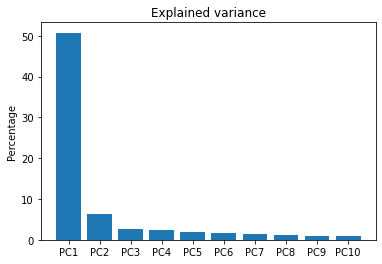

In [24]:
import matplotlib.pyplot as plt

print('Var. explained: %s'% str(pca.explained_variance_ratio_))
n_pc = 10

plt.bar(range(n_pc), pca.explained_variance_ratio_[0:10]*100)
plt.xticks(range(n_pc), ['PC'+str(i) for i in range(1,n_pc+1)])
plt.title("Explained variance")
plt.ylabel("Percentage")
plt.show()

Construir scores plot com os resultados do PCA e comparar com variável *Activity*

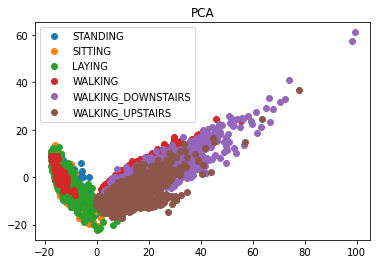

In [25]:
for act in allXy['Activity'].unique():
    sp = allXy.index[allXy['Activity']==act]-1
    plt.plot(X_reduced[sp,0],X_reduced[sp,1],'o',label=act)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()

Correr clustering k-means; comparar clusters com variável *Activity*

In [26]:
from sklearn.cluster import KMeans

k=6
kmeans_har = KMeans(n_clusters=k, max_iter=1000)
kmeans_har.fit(sc_input)
labels = kmeans_har.labels_

pd.crosstab(labels, allXy["Activity"], rownames=['clusters'] )

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clusters,,,,,,
0,0,0,0,77,196,5
1,54,1238,1346,0,0,0
2,5,1,0,903,321,1242
3,0,0,0,742,889,295
4,1556,91,0,0,0,0
5,329,447,560,0,0,2


Correr clustering hierárquico usando os dados agregados e visualizar árvore resultante colorindo folhas com variável *Activity*

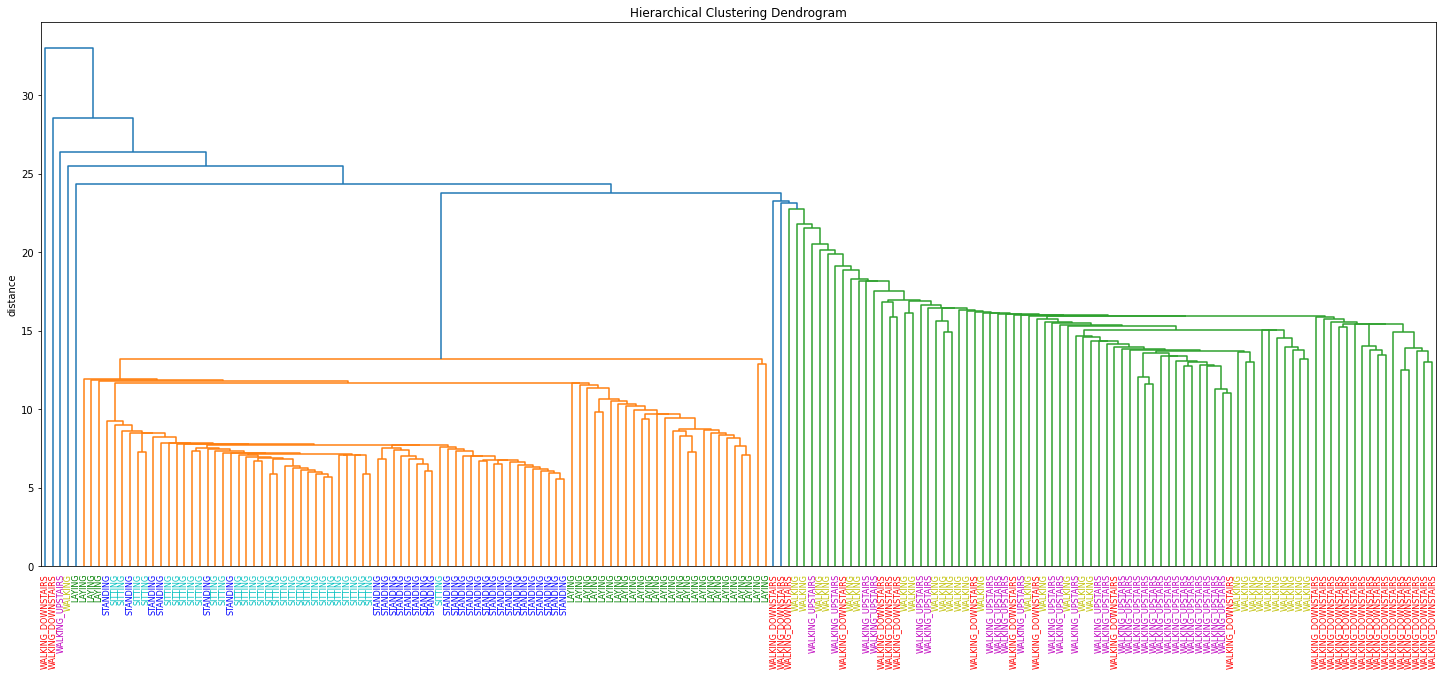

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

grouped_sc = preprocessing.scale(grouped.iloc[:,2:])

Z = linkage(grouped_sc, method='single', metric='euclidean')

plt.figure(figsize=(25, 10))
dendrogram(Z, 
	labels=list(grouped.index.get_level_values(1)),    		leaf_rotation=90., leaf_font_size=8.)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
lcolors = {'STANDING':'b', "WALKING_UPSTAIRS":"m", "LAYING":'g', 'SITTING':'c', "WALKING" :"y", "WALKING_DOWNSTAIRS":"r"}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
  lbl.set_color(lcolors[lbl.get_text()])
plt.show()


### Aprendizagem máquina - modelos supervisionados

Dividir dados em partição de treino e teste (mantendo 30% no test set); verificar distribuição nas labels no training e test set

Treinar modelos de base com vários classificadores no conjunto de dados de treino. Avaliar cada um destes modelos com validação cruzada.

In [28]:
from sklearn.model_selection import cross_val_score


Considerando o modelo mais prometedor, experimentar a seleção de atributos baseadas em testes estatísticos univariados (ANOVA), considerando uma redução para metade do número de variáveis.

Considerando o modelo mais prometedor fazer um processo de otimização de hiperparâmetros

Criar um modelo ensemble com base nos 3 melhores modelos que experimentou

Estime o erro do melhor modelo obtido no test set.

Treinar o modelo final da forma mais adequada